# Medical Insurance Cost
---

### Step 1: Problem statement and data collection

### Step 2: Exploration and data cleaning
- #### 2.1 Summarize DF
- #### 2.2 Eliminate duplicates
- #### 2.3 Elimnate irrelevant information

### Step 3: Analysis of univariate variables
- #### 3.1 Analysis of categorical variables
- #### 3.2 Analysis of numerical variables

### Step 4: Analysis of multivariate variables
- #### 4.1 Numerical-numerical analysis
- #### 4.2 Categorical-categorical analysis
- #### 4.3 Other mixed analysis
- #### 4.4 From string to numerical transformation --> <i>JSON saving</i>
- #### 4.5 Correlation matrix

### Step 5: Feature engineering
- #### 5.1 Outliers analysis
- #### 5.2 Upper and lower limits of outliers variables --> <i>JSON saving</i>
- #### 5.3 Copy 2 DataFrames: with and without outliers
- #### 5.4 Missing value analysis
- #### 5.5 Inference of new features
- #### 5.6 Feature Scaling
    - ##### 5.6.1 train test
    - ##### 5.6.2 Normalization
    - ##### 5.6.3 Min-Max Scaling

### Step 6: Feature selection
---

Imported Libraries

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import json
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.feature_selection import f_classif, SelectKBest
from pickle import dump
import warnings

def ignore_warn(*args, **kwargs):
    pass
warnings.warn = ignore_warn # ignore annoying warning (from sklearn and seaborn)

pd.set_option('display.float_format', lambda x: '{:.3f}'.format(x)) #Limiting floats output to 3 decimal points
'''NOTE: This affects only the display and not the underlying data, which remains unchanged.'''

'NOTE: This affects only the display and not the underlying data, which remains unchanged.'

## Step 1: Problem statement and data collection

**Objective**

The primary goal of this EDA is to understand how different factors influence health insurance charges (the target variable charges)

**Context of the Analysis**

In the health insurance industry, premiums are determined based on various personal and health-related factors. This dataset provides an opportunity to explore the effect of variables like age, BMI, smoking status, and region on insurance costs, helping insurers better segment and price policies

In [ ]:
# Import the dataset

df = pd.read_csv("https://raw.githubusercontent.com/4GeeksAcademy/linear-regression-project-tutorial/main/medical_insurance_cost.csv")

df.head(3)

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.924
1,18,male,33.770,1,no,southeast,1725.552
2,28,male,33.000,3,no,southeast,4449.462


**Description andd types of Data**

- `age` --> Age of primary beneficiary (numeric)
- `sex`--> Gender of the primary beneficiary (categorical)
- `bmi`--> Body mass index (numeric)
- `children`--> Number of children/dependents covered by health insurance  (numeric)
- `smoker`--> Is the person a smoker? (categorical)
- `region`--> Beneficiary's residential area in the U.S.: northeast, southeast, southwest, northwest (categorical)
- `charges` `(target)` -->  Health insurance premium (numerical)
---

## Step 2: Exploration and data cleaning
- ### 2.1 Summarize DF

In [ ]:
# Obtain dimensions

rows, columns = df.shape

print(f"The dimensions of this dataset are: {rows} Rows and {columns} Columns")

The dimensions of this dataset are: 1338 Rows and 7 Columns


In [ ]:
# Obtain information about data types and non-null values

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [ ]:
# Check null values

null_var = df.isnull().sum().loc[lambda x: x > 0] # Number of nulls in each variable.

num_of_null_var = len(null_var) # Number of variables with almost 1 null.

print(f"{null_var}\nAnd the number of null variables are {num_of_null_var}")

Series([], dtype: int64)
And the number of null variables are 0


----------<b>Conclusions</b>----------

- There are a total of 1338 rows and 7 columns, among which we find the target or class to predict, `charges`.

- All variables always have a value.

- The data has 4 numerical characteristics and 3 categorical characteristics.
---

- ### 2.2 Eliminate duplicates

In [ ]:
# Obtain the number of duplicate values in our dataset

num_duplicate_values = df.duplicated().sum()

print(f"The number of duplicate values in the dataset is {num_duplicate_values}")

The number of duplicate values in the dataset is 1


In [ ]:
# Dataset copy

filt_df = df.copy()


# Eliminate the duplicate

if num_duplicate_values:

    filt_df = filt_df.drop_duplicates()

print(filt_df.shape)

filt_df.head(3)

(1337, 7)


,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.924
1,18,male,33.770,1,no,southeast,1725.552
2,28,male,33.000,3,no,southeast,4449.462


In [ ]:
# Obtain the number of duplicate values in our ¡FILTERED! dataset

num_duplicate_values = filt_df.duplicated().sum()

print(f"The number of duplicate values in the dataset is {num_duplicate_values}")

The number of duplicate values in the dataset is 0


---

## Step 3: Analysis of univariate variables

- ### 3.1 Analysis of categorical variables

   To represent these types of variables we will use histograms. Before we start plotting, we must identify which ones are categorical, and this can be easily checked by analyzing the range of values. In this case, the categorical variables are: 
   - ###### `sex`
   - ###### `smoker`
   - ###### `region`

In [ ]:
categorical_var = []

for column in filt_df: 

    if filt_df[column].dtype == 'object':

        categorical_var.append(column)


print(f"Categorical Variables are:\n{categorical_var}\n\nTotal = {len(categorical_var)}")

Categorical Variables are:
['sex', 'smoker', 'region']

Total = 3


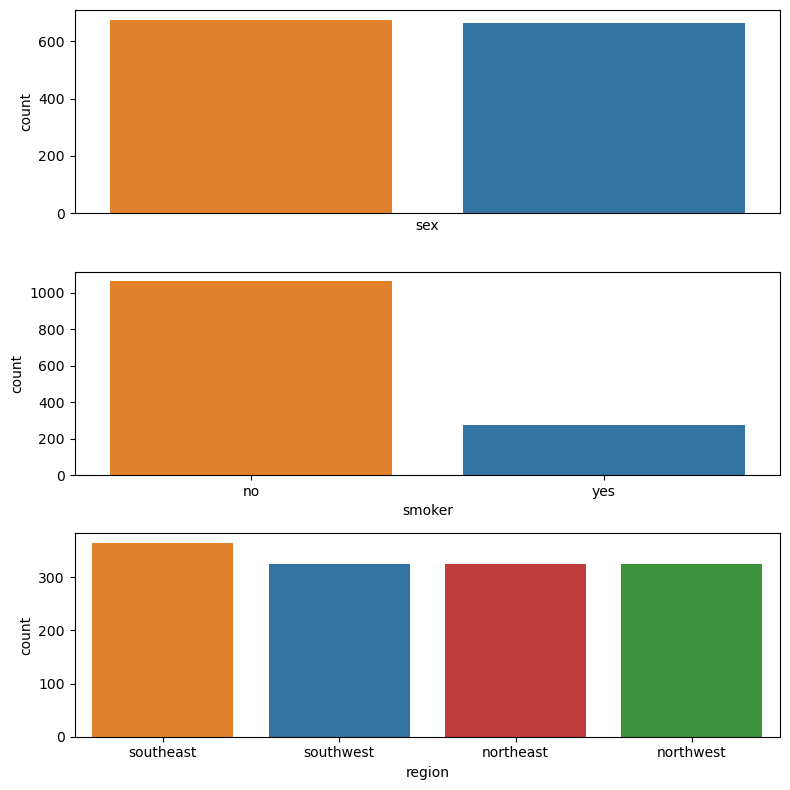

In [ ]:
# Why I use countplot instead of histogram for categorical variables?
# Countplot is used to show the count of observations for each category in a categorical variable.
# Histplot is used to display the distribution of a numerical variable by dividing it into 
# intervals, or "bins," and showing the frequency of observations in each bin.


# Frecuency of each category and histogram

fig, axis = plt.subplots(3, 1, figsize = (8, 8))


# Create Histogram (Countplots)

sns.countplot(ax = axis[0],
                data = filt_df,
                    x = "sex",
                        hue = "sex",
                            order=filt_df['sex'].sort_values().value_counts().index).set_xticks([])


sns.countplot(ax = axis[1],
                data = filt_df,
                    x = "smoker",
                        hue = "smoker",
                            order=filt_df['smoker'].sort_values().value_counts().index)



sns.countplot(ax = axis[2],
                data = filt_df, 
                    x = "region",
                        hue = "region",
                            order=filt_df['region'].sort_values().value_counts().index)




# Adjust the layout
plt.tight_layout()

# Show the plot
plt.show()

----------**Conclusions**----------

- `sex`: It appears that there are similar numbers of male and female beneficiaries, with perhaps a slight difference in counts.

- `smoker`: There is a notable difference between non-smokers and smokers, with non-smokers being much more common in the dataset.

- `region`: The beneficiaries are relatively evenly distributed across the four regions: southeast, southwest, northeast, and northwest, with the southeast having a slightly higher count.
---

- ### 3.2 Analysis of numerical variables

    A **numeric variable** is a type of variable that can take numeric values (integers, fractions, decimals, negatives, etc.) in an infinite range. They are usually represented using a **histogram and a boxplot**, displayed together. Before starting to plot, we must also identify which are the numerical ones, which are:
    - ###### `age`       
    - ###### `children`
    - ###### `bmi`
    - ###### `charges`

In [ ]:
numerical_var_int = []
numerical_var_float = []

for column in filt_df: 

    if (filt_df[column].dtype == 'int64') :

        numerical_var_int.append(column)

    elif (filt_df[column].dtype == 'float64'):

        numerical_var_float.append(column)

print('============================================')
print(f"Numerical (int) Variables are:\n\n{numerical_var_int}\n\nTotal = {len(numerical_var_int)}")
print('============================================')
print(f"Numerical (float64) Variables are:\n\n{numerical_var_float}\n\nTotal = {len(numerical_var_float)}")
print('============================================')

Numerical (int) Variables are:

['age', 'children']

Total = 2
Numerical (float64) Variables are:

['bmi', 'charges']

Total = 2


<Axes: xlabel='charges'>

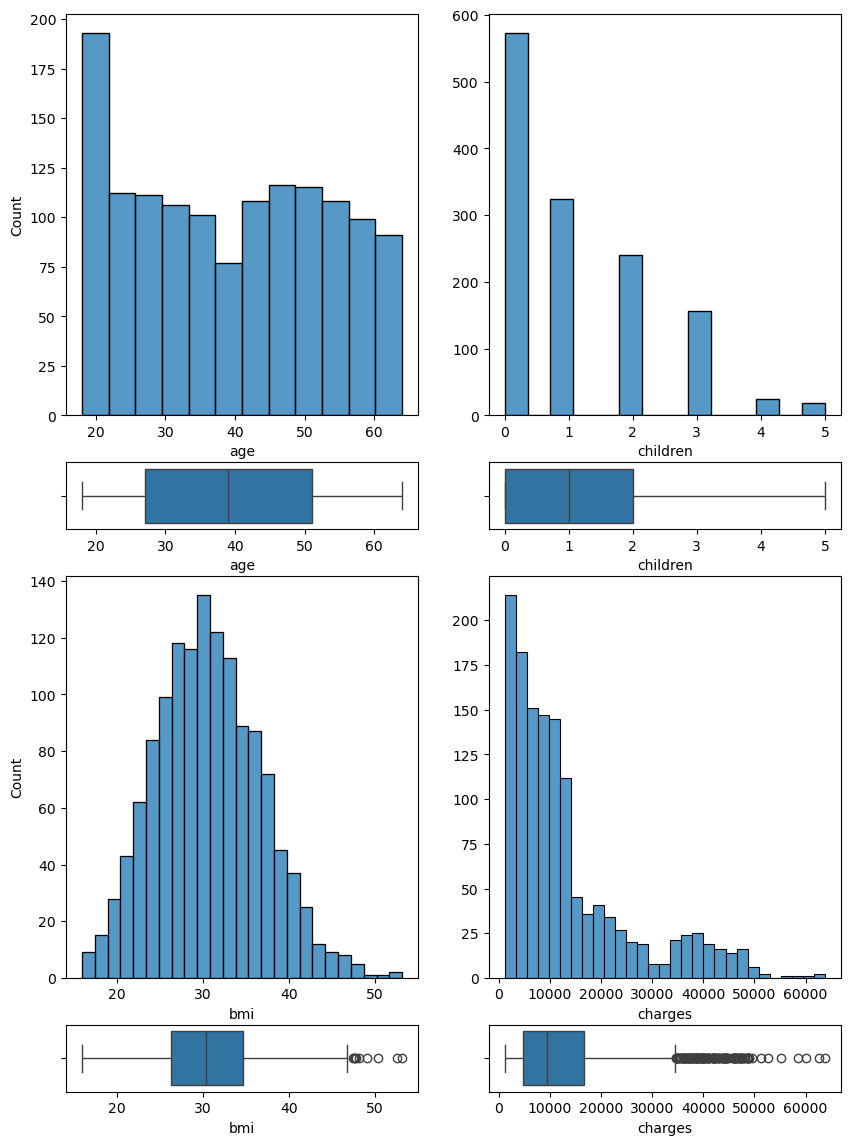

In [ ]:
fig, axis = plt.subplots(4, 2,
                            figsize = (10, 14),
                                gridspec_kw={'height_ratios': [6, 1, 6, 1]})


# ==========================Variable age==========================
sns.histplot(ax = axis[0, 0],
                data = filt_df, 
                    x = "age")

sns.boxplot(ax = axis[1, 0],
                data = filt_df,
                     x = "age")


# ==========================Variable children==========================
sns.histplot(ax = axis[0, 1],
                data = filt_df, 
                     x = "children").set(ylabel = None)

sns.boxplot(ax = axis[1, 1],
                data = filt_df, 
                     x = "children")



#-------------------------float64------------------------------------------------------------------

# ==========================Variable bmi======================== 
sns.histplot(ax = axis[2, 0],
                data = filt_df, 
                    x = "bmi")

sns.boxplot(ax = axis[3, 0],
                data = filt_df,
                    x = "bmi")

# ==========================Variable charges===========================
sns.histplot(ax = axis[2, 1],
                data = filt_df, 
                    x = "charges").set(ylabel = None)

sns.boxplot(ax = axis[3, 1],
                data = filt_df,
                    x = "charges")

----------**Breakdown**----------

`Age`:

- Histogram: The age distribution appears to be fairly uniform between 20 and 60 years, with a higher concentration of individuals in the 20-25 age range.
- Boxplot: Age values are spread fairly evenly, with no apparent outliers. The median age seems to be around 40 years.

`Children`:

- Histogram: Most beneficiaries have 0 or 1 child, with the frequency decreasing as the number of children increases. Very few have 4 or 5 children.
- Boxplot: The distribution shows that most people have 0 to 2 children, and the number of outliers (people with more than 3 children) is limited.

`BMI`:

- Histogram: The BMI distribution appears to be approximately normal, with most values centered around 30.
- Boxplot: There are several outliers on the higher end of the BMI scale, indicating some individuals have an exceptionally high BMI.

`Charges`:

- Histogram: The charges are right-skewed, with many individuals having lower insurance costs, but some incurring very high charges.
- Boxplot: There are numerous outliers on the higher end, suggesting a significant number of individuals with unusually high insurance premiums.
---

## Step 4: Analysis of multivariate variables
- ### 4.1 Numerical-numerical analysis

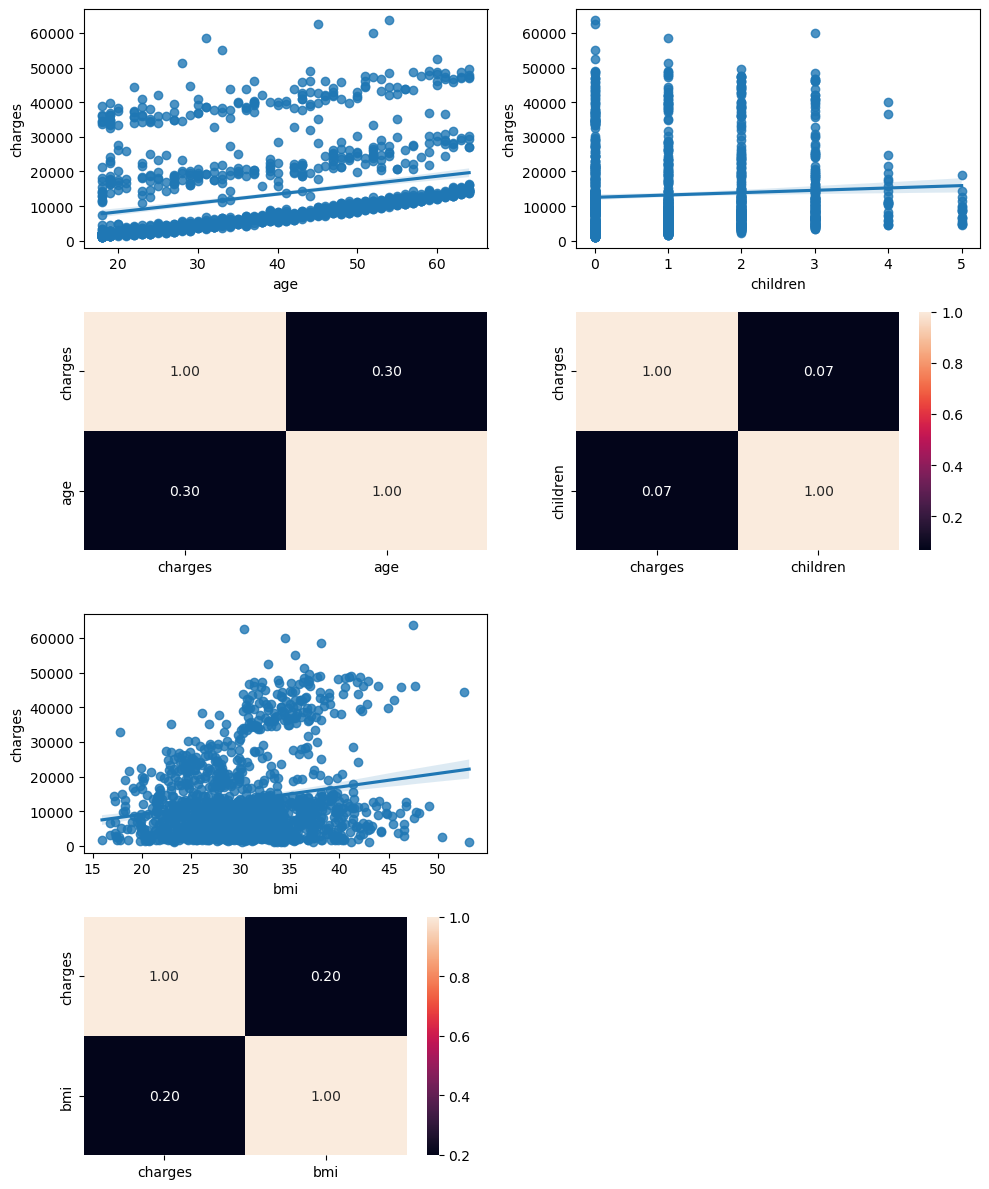

In [ ]:
fig, axis = plt.subplots(4, 2, figsize = (10, 12))


# Analysis of variable 'age' respect 'charges'
sns.regplot(ax = axis[0,0],
                data = filt_df,
                    x = "age", 
                         y = "charges")

sns.heatmap(filt_df[["charges", "age"]].corr(),
                annot = True, 
                    fmt = ".2f", 
                        ax = axis[1, 0], 
                            cbar = False)


# Analysis of variable 'children' respect 'charges'
sns.regplot(ax = axis[0,1],
                data = filt_df,
                    x = "children", 
                         y = "charges")

sns.heatmap(filt_df[["charges", "children"]].corr(), 
                annot = True, 
                    fmt = ".2f",
                        ax = axis[1, 1])


# Analysis of variable 'bmi' respect 'charges'
sns.regplot(ax = axis[2,0],
                data = filt_df, 
                    x = "bmi", 
                        y = "charges")

sns.heatmap(filt_df[["charges", "bmi"]].corr(),
                annot = True, 
                    fmt = ".2f", 
                        ax = axis[3,0])


# Remove the empty axes
fig.delaxes(ax = axis[2,1])
fig.delaxes(ax = axis[3,1])

# Adjust the layout
plt.tight_layout()

# Show the plot
plt.show()

----------**Conclusions**----------


---

- ### 4.2 Categorical-categorical analysis

    When the two variables being compared have categorical data, the analysis is said to be categorical-categorical. Histograms and combinations are used to compare two categorical columns.

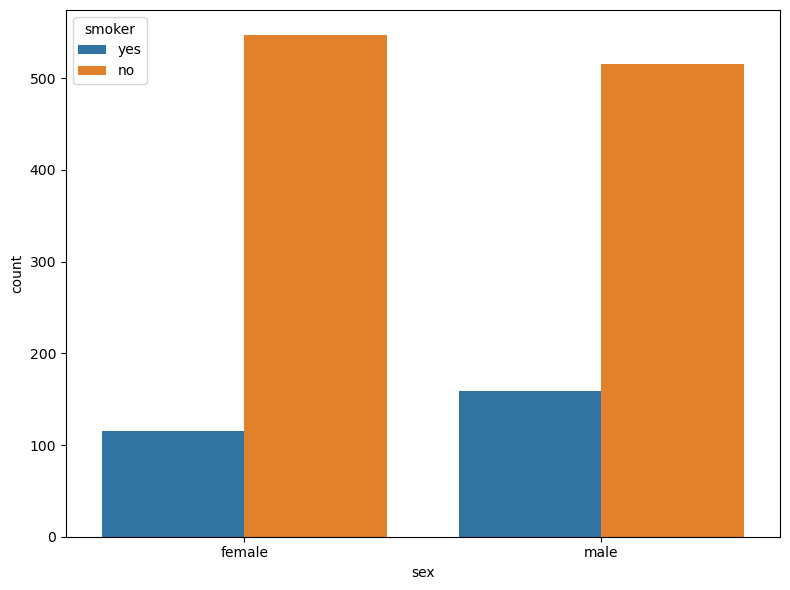

In [ ]:
plt.figure(figsize=(8,6))

sns.countplot( data = filt_df,
                x = "sex",
                    hue = "smoker")

plt.tight_layout()
plt.show()

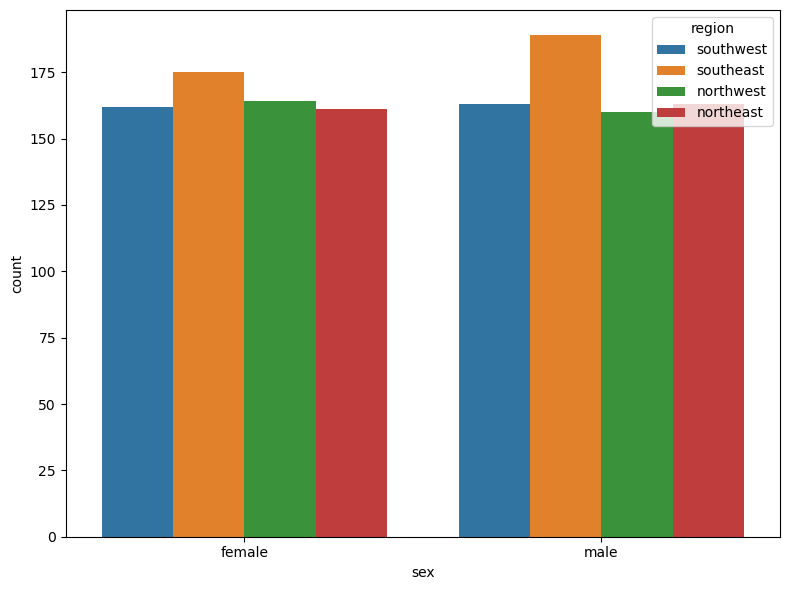

In [ ]:
plt.figure(figsize=(8,6))

sns.countplot( data = filt_df,
                x = "sex",
                    hue = "region")

plt.tight_layout()
plt.show()

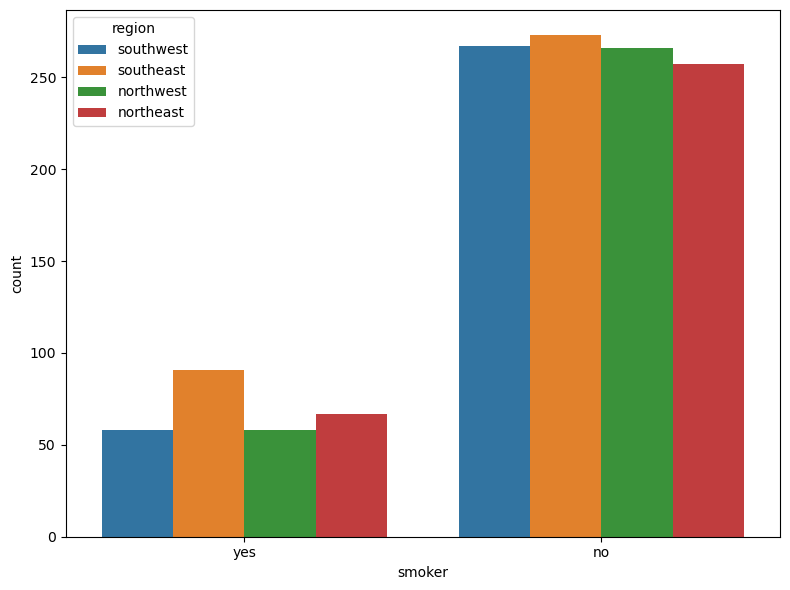

In [ ]:
plt.figure(figsize=(8,6))

sns.countplot( data = filt_df,
                x = "smoker",
                    hue = "region")

plt.tight_layout()
plt.show()

- ### 4.4 From string to numerical transformation --> JSON saving

In [ ]:
def encoding(dataset, variable, json_path):

    factorize = pd.factorize(dataset[variable])

    parsing_dict = {}

    indexes = factorize[1]

    set_factor = list(set(factorize[0]))

    for index in range(len(factorize[1])):
        parsing_dict.update({indexes[index]: int(set_factor[index])})

    with open(json_path, "w") as f:
        json.dump(parsing_dict, f)

In [ ]:
# Encoding Variable 'sex'
encoding(filt_df, "sex", "../data/interim/transform_sex.json")

# Encoding Variable 'smoker'
encoding(filt_df, "smoker", "../data/interim/transform_smoker.json")

# Encoding Variable 'region'
encoding(filt_df, "region", "../data/interim/transform_region.json")

In [ ]:
def open_encoded_var(dataset, variable, json_path):

    with open(json_path, "r") as f:
        job_dict = json.load(f)

    dataset[variable] = dataset[variable].apply(lambda x: job_dict.get(x))

In [ ]:
# Open Variable 'sex'
open_encoded_var(filt_df, "sex", "../data/interim/transform_sex.json")

# Open Variable 'smoker'
open_encoded_var(filt_df, "smoker", "../data/interim/transform_smoker.json")

# Open Variable 'region'
open_encoded_var(filt_df, "region", "../data/interim/transform_region.json")

- ### 4.5 Correlation matrix (Numerical-Categorical analysis)

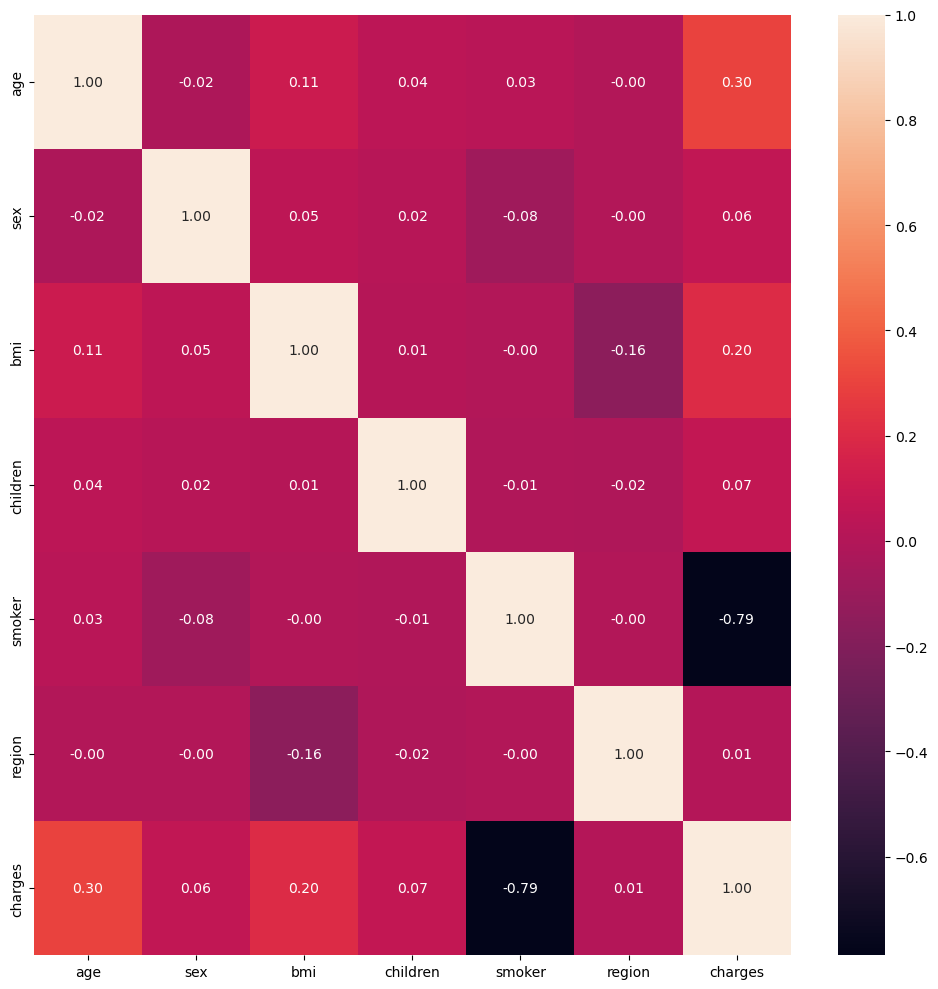

In [ ]:
fig, axes = plt.subplots(figsize=(10, 10))


sns.heatmap(filt_df[['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges']].corr(),
                            annot = True,
                                 fmt = ".2f")


plt.tight_layout()


plt.show()

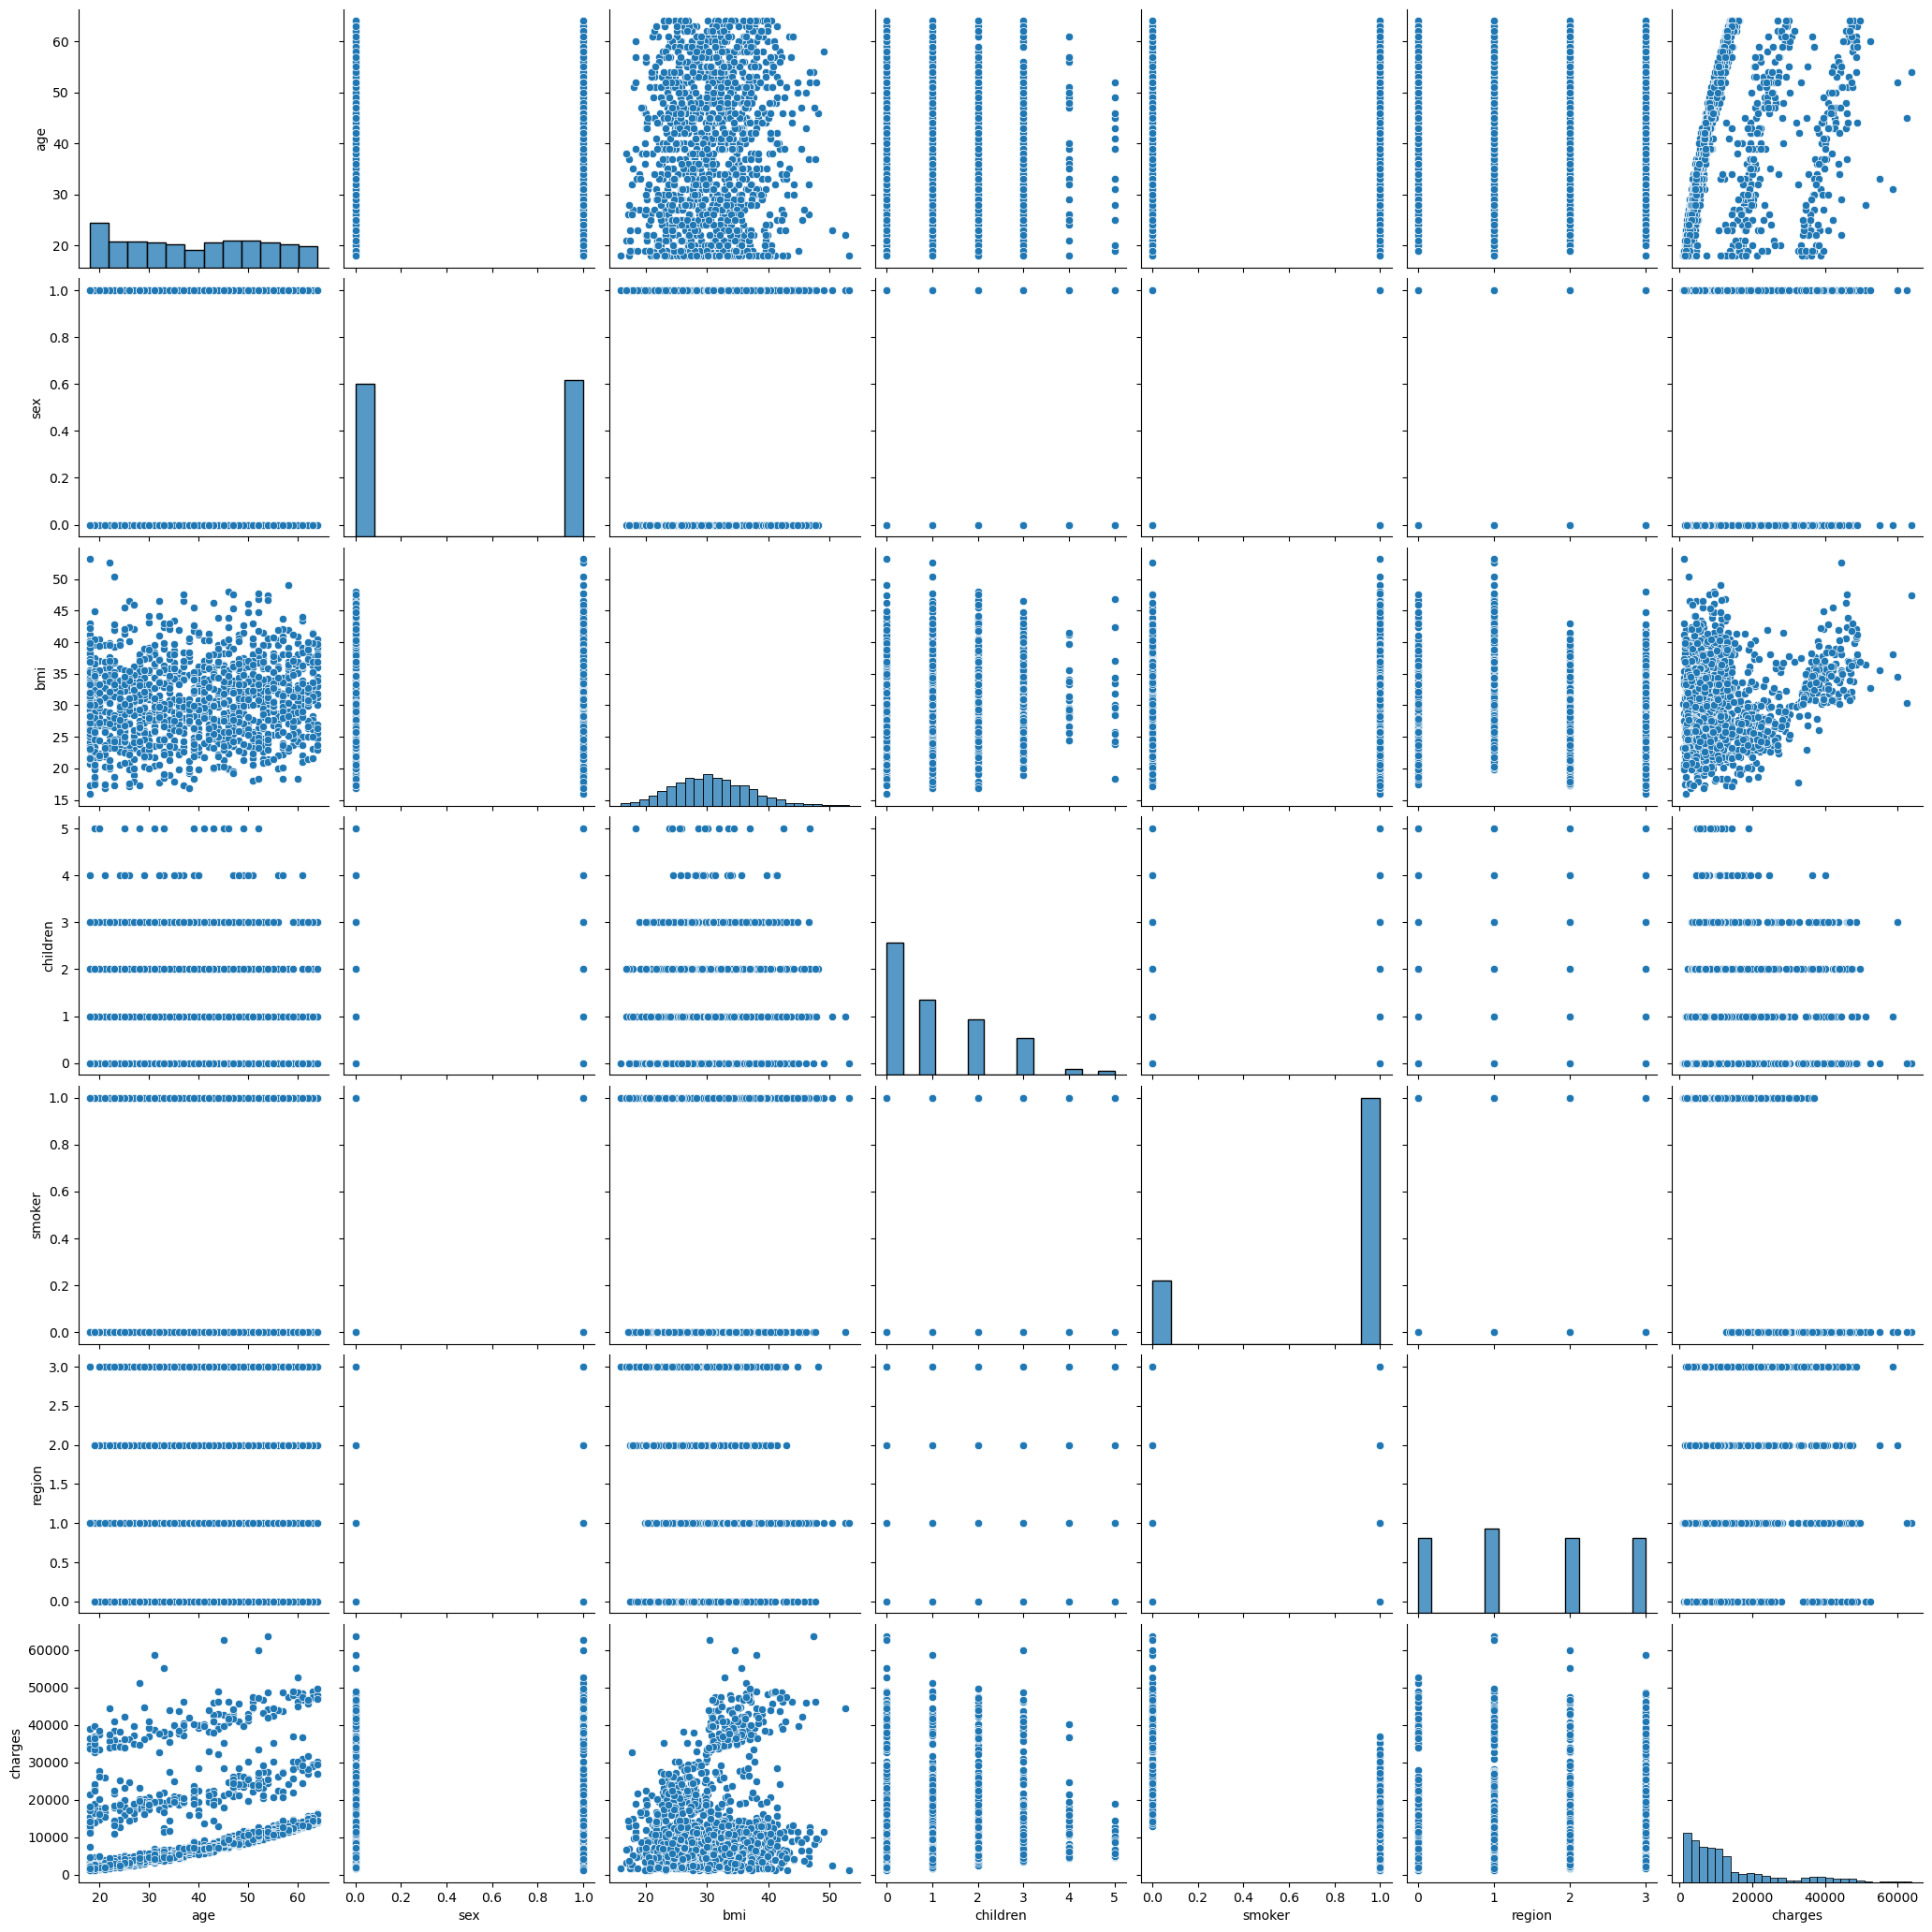

In [ ]:
sns.pairplot(filt_df, height=3, diag_kind='hist')

## Step 5: Feature engineering
- ### 5.1 Outliers analysis

In [ ]:
total_stats = filt_df.describe()

total_stats

,age,sex,bmi,children,smoker,region,charges
count,1337.000,1337.000,1337.000,1337.000,1337.000,1337.000,1337.000
mean,39.222,0.505,30.663,1.096,0.795,1.484,13279.121
std,14.044,0.500,6.100,1.206,0.404,1.105,12110.360
min,18.000,0.000,15.960,0.000,0.000,0.000,1121.874
25%,27.000,0.000,26.290,0.000,1.000,1.000,4746.344
50%,39.000,1.000,30.400,1.000,1.000,1.000,9386.161
75%,51.000,1.000,34.700,2.000,1.000,2.000,16657.717
max,64.000,1.000,53.130,5.000,1.000,3.000,63770.428


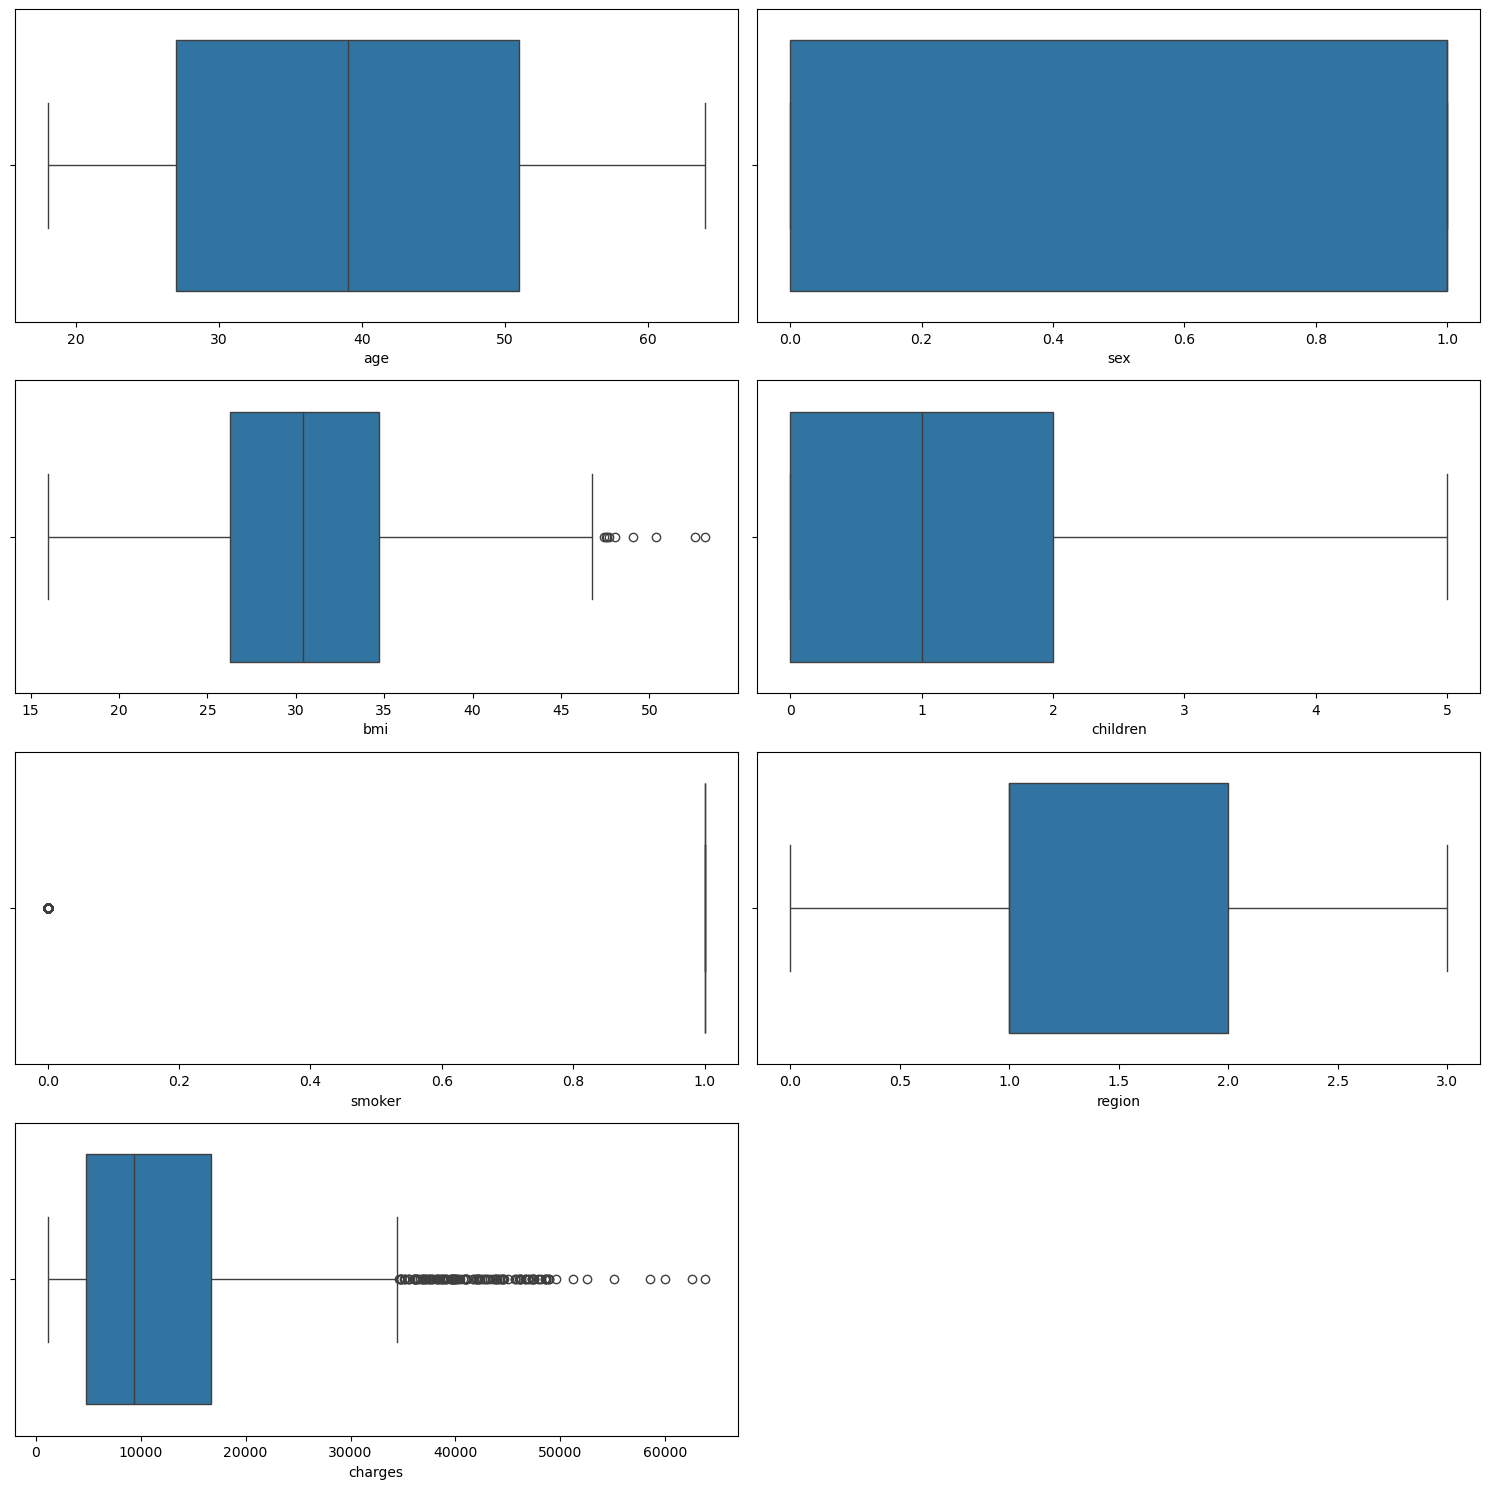

In [ ]:
fig, axes = plt.subplots(4, 2, figsize = (15, 15))


sns.boxplot(ax = axes[0, 0],
                data = filt_df,
                    x = "age")
sns.boxplot(ax = axes[0, 1],
                data = filt_df,
                    x = "sex")
sns.boxplot(ax = axes[1, 0],
                data = filt_df,
                    x = "bmi")


sns.boxplot(ax = axes[1, 1],
                data = filt_df,
                    x = "children")
sns.boxplot(ax = axes[2, 0],
                data = filt_df, 
                    x = "smoker")
sns.boxplot(ax = axes[2, 1],
                data = filt_df, 
                    x = "region")


sns.boxplot(ax = axes[3, 0],
                data = filt_df,
                     x = "charges")

# Remove the empty axes
fig.delaxes(ax = axes[3,1])

# Adjust the layout
plt.tight_layout()

# Show the plot
plt.show()

- ### 5.2 Upper and lower limits of outliers variables --> JSON saving

In [ ]:
def def_outliers(total_stats, variable, json_file):

    individual_stats = total_stats[variable] # Save the stats for IQR

    iqr = individual_stats["75%"] - individual_stats["25%"]
    upper_limit = individual_stats["75%"] + (2 * iqr) 
    lower_limit = individual_stats["25%"] - (2 * iqr)

    if (lower_limit < 0): lower_limit = 0

    print(f"\nThe upper_limit of Variable {variable} is {round(upper_limit, 3)}, the lower_limit is {round(lower_limit, 3)} and the IQR is {round(iqr, 3)}")
    print('                      ==========================================                  ')
    with open(json_file, "w") as f:
        json.dump({
            "upper_limit": upper_limit,
            "lower_limit": lower_limit
        }, f)

In [ ]:
# Outliers saved in JSON

def_outliers(total_stats, "bmi", "../data/interim/outliers_bmi.json")

def_outliers(total_stats, "charges", "../data/interim/outliers_charges.json")


The upper_limit of Variable bmi is 51.52, the lower_limit is 9.47 and the IQR is 8.41

The upper_limit of Variable charges is 40480.464, the lower_limit is 0 and the IQR is 11911.373


- ### 5.3 Copy 2 DataFrames: with and without outliers

In [ ]:
df_with_outliers = filt_df.copy()
df_without_outliers = filt_df.copy()

'''Todos los Outliers modificados los guardaremos actualizaremos en df_sin_outliers'''

'Todos los Outliers modificados los guardaremos actualizaremos en df_sin_outliers'

In [ ]:
def open_outliers(dataset_without_outliers, variable, json_path):

    with open(json_path, "r") as f:
        outliers = json.load(f)

    upper_limit_ = outliers["upper_limit"]

    lower_limit_ = outliers["lower_limit"]

    dataset_without_outliers[variable] = dataset_without_outliers[variable].apply(
        lambda x: upper_limit_ if (x > upper_limit_) else (lower_limit_ if (x < lower_limit_) else x)
        )

In [ ]:
# Open Outliers_bmi and replace the values
open_outliers(df_without_outliers, "bmi", "../data/interim/outliers_bmi.json")

# Open Outliers_charges and replace the values
open_outliers(df_without_outliers, "charges", "../data/interim/outliers_charges.json")



- ### 5.4 Missing value analysis

In [ ]:
filt_df.isna().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

- ### 5.6 Fetaure Scaling
    - #### 5.6.1 Train test

In [ ]:
def train_test(target_var, df, test_size=0.2, random_state=42):
    
    X = df.drop(columns = target_var)
    y = df[target_var]

    X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                         test_size = test_size,
                                                           random_state = random_state)
    
    return X_train, X_test, y_train, y_test

In [ ]:
# Split original dataframe 

# With Outliers
X_train_with_outliers, X_test_with_outliers, y_train, y_test = train_test('charges', df_with_outliers)

# Without Outliers
X_train_without_outliers, X_test_without_outliers, _, _ = train_test('charges', df_without_outliers)

- #### 5.6.2 Normalization 

In [ ]:
'''def norm(X_train,
          X_test,
            type_df: str): # with OR without outliers

    scaler = StandardScaler()
    scaler.fit(X_train)
    
    X_train_norm = scaler.transform(X_train)
    X_train_norm = pd.DataFrame(X_train_norm, 
                                index = X_train.index,
                                  columns = X_train.columns)

    X_test_norm = scaler.transform(X_test)
    X_test_norm = pd.DataFrame(X_test_norm,
                                index = X_test.index,
                                  columns = X_test.columns)

    dump(scaler, open(f'../data/interim/normalized_{type_df}.sav', 'wb'))

    return X_train_norm, X_test_norm'''

In [ ]:
'''# With Outliers
X_train_with_outliers_norm, X_test_with_outliers_norm = norm(X_train_with_outliers,
                                                              X_test_with_outliers,
                                                                'with_outliers')


# Without Outliers
X_train_without_outliers_norm, X_test_without_outliers_norm = norm(X_train_without_outliers,
                                                                    X_test_without_outliers,
                                                                      'without_outliers')'''

- #### 5.6.3 Min-Max Scaling

In [ ]:
'''def minmax(X_train,
            X_test,
              type_df: str): # with OR without outliers

    scaler = MinMaxScaler()
    scaler.fit(X_train)
    
    X_train_minmax = scaler.transform(X_train)
    X_train_minmax = pd.DataFrame(X_train_minmax,
                                   index = X_train.index, 
                                    columns=X_train.columns)

    X_test_minmax = scaler.transform(X_test)
    X_test_minmax = pd.DataFrame(X_test_minmax,
                                  index = X_test.index,
                                    columns=X_test.columns)
    
    dump(scaler, open(f'../data/interim/minmax_{type_df}.sav', 'wb'))

    return X_train_minmax, X_test_minmax'''

In [ ]:
'''# With Outliers
X_train_with_outliers_minmax, X_test_with_outliers_minmax = minmax(X_train_with_outliers,
                                                                    X_test_with_outliers,
                                                                      'with_outliers')

# Without Outliers
X_train_without_outliers_minmax, X_test_without_outliers_minmax = minmax(X_train_without_outliers,
                                                                          X_test_without_outliers,
                                                                            'without_outliers')'''

## Step 6: Feature selection

In [ ]:
def kselection(X_train,
                X_test,
                  y_train,
                    k, # This function selects the 'k' best feat. from our dataset
                      type_df: str): # with OR without outliers

    selection_model = SelectKBest(f_classif, k=k)
    selection_model.fit(X_train, y_train)

    cols = selection_model.get_support()

    X_train_sel = pd.DataFrame(selection_model.transform(X_train),
                                columns=X_train.columns.values[cols]) 
    X_test_sel = pd.DataFrame(selection_model.transform(X_test),
                               columns=X_test.columns.values[cols])

    dump(selection_model, open(f'../data/interim/selection_model_{type_df}.sav', 'wb'))

    return X_train_sel, X_test_sel   

In [ ]:
# With Outliers
X_train_with_outliers_sel, X_test_with_outliers_sel = kselection(X_train_with_outliers,
                                                                  X_test_with_outliers,
                                                                    y_train, 6,
                                                                      'with_outliers')

# Without Outliers
X_train_without_outliers_sel, X_test_without_outliers_sel = kselection(X_train_without_outliers,
                                                                        X_test_without_outliers,
                                                                          y_train, 6,
                                                                            'without_outliers')

c:\Users\Fermin\anaconda3\Lib\site-packages\sklearn\feature_selection\_univariate_selection.py:109: RuntimeWarning: invalid value encountered in divide
  msw = sswn / float(dfwn)
c:\Users\Fermin\anaconda3\Lib\site-packages\sklearn\feature_selection\_univariate_selection.py:109: RuntimeWarning: invalid value encountered in divide
  msw = sswn / float(dfwn)


- ### 6.1 Appying the filter to the normalized and minmax scaled data frames

In [ ]:
'''#=========================normalized========================

# X_train normalized----------------
    # With Outliers
X_train_with_outliers_norm_sel = X_train_with_outliers_norm[X_train_with_outliers_sel.columns]
    # Without Outliers
X_train_without_outliers_norm_sel = X_train_without_outliers_norm[X_train_with_outliers_sel.columns]

# X_test normalized-----------------
    # With Outliers
X_test_with_outliers_norm_sel = X_test_with_outliers_norm[X_test_with_outliers_sel.columns]
    # Without Outliers
X_test_without_outliers_norm_sel = X_test_without_outliers_norm[X_test_with_outliers_sel.columns]

#==========================min-max==========================

# X_train min-max-------------------
    # With Outliers
X_train_with_outliers_minmax_sel = X_train_with_outliers_minmax[X_train_with_outliers_sel.columns]
    # Without Outliers
X_train_without_outliers_minmax_sel = X_train_without_outliers_minmax[X_train_without_outliers_sel.columns]

# X_test min-max--------------------
    # With Outliers
X_test_with_outliers_minmax_sel = X_test_with_outliers_minmax[X_test_with_outliers_sel.columns]
    # Without Outliers
X_test_without_outliers_minmax_sel = X_test_without_outliers_minmax[X_test_without_outliers_sel.columns]'''

- ### 6.2 Saving the CSV files

In [ ]:
# Train data frames
X_train_with_outliers_sel.to_csv('../data/processed/X_train_with_outliers_sel.csv', index=False)
X_train_without_outliers_sel.to_csv('../data/processed/X_train_without_outliers_sel.csv', index=False)
'''X_train_with_outliers_norm_sel.to_csv('../data/processed/X_train_with_outliers_norm_sel.csv', index=False)
X_train_without_outliers_norm_sel.to_csv('../data/processed/X_train_without_outliers_norm_sel.csv', index=False)
X_train_with_outliers_minmax_sel.to_csv('../data/processed/X_train_with_outliers_minmax_sel.csv', index=False)
X_train_without_outliers_minmax_sel.to_csv('../data/processed/X_train_without_outliers_minmax_sel.csv', index=False)'''
y_train.to_csv('../data/processed/y_train.csv', index=False)

# Test data frames
X_test_with_outliers_sel.to_csv('../data/processed/X_test_with_outliers_sel.csv', index=False)
X_test_without_outliers_sel.to_csv('../data/processed/X_test_without_outliers_sel.csv', index=False)
'''X_test_with_outliers_norm_sel.to_csv('../data/processed/X_test_with_outliers_norm_sel.csv', index=False)
X_test_without_outliers_norm_sel.to_csv('../data/processed/X_test_without_outliers_norm_sel.csv', index=False)
X_test_with_outliers_minmax_sel.to_csv('../data/processed/X_test_with_outliers_minmax_sel.csv', index=False)
X_test_without_outliers_minmax_sel.to_csv('../data/processed/X_test_without_outliers_minmax_sel.csv', index=False)'''
y_test.to_csv('../data/processed/y_test.csv', index=False)